In [1]:
%pip install scikit-learn matplotlib seaborn opencv-python



[INFO] Loading LFW dataset...
[INFO] Loaded 1560 images of shape (50, 37)


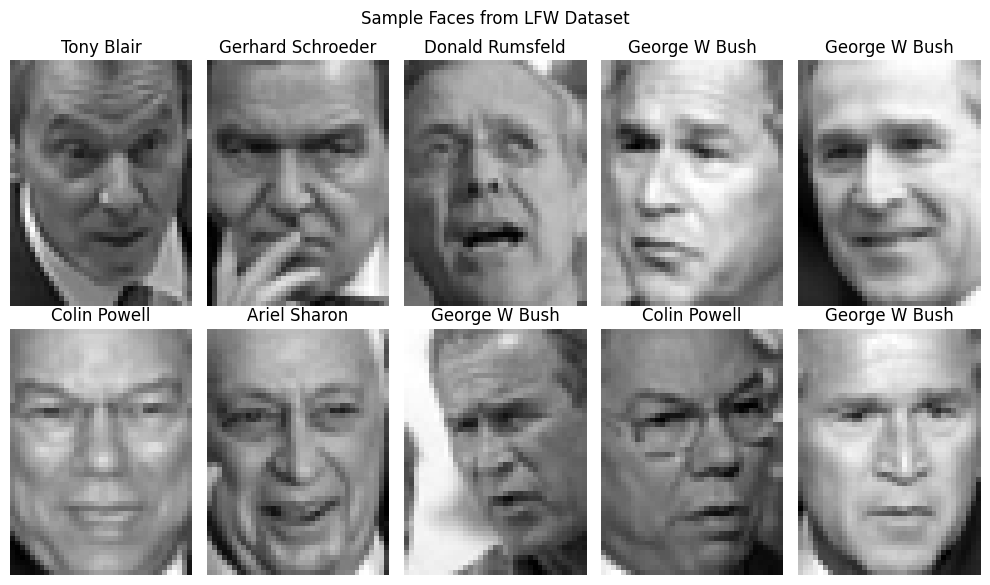

[INFO] Preprocessing data (scaling)...
[INFO] Applying PCA with 150 components...
[INFO] Training SVM classifier...
[INFO] Evaluating model...
[RESULT] Accuracy: 81.03%

[DETAILS] Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.75      0.75        16
     Colin Powell       0.57      0.94      0.71        66
  Donald Rumsfeld       0.88      0.78      0.82        27
    George W Bush       0.94      0.83      0.88       140
Gerhard Schroeder       0.83      0.79      0.81        24
      Hugo Chavez       0.90      0.53      0.67        17
   Jacques Chirac       1.00      0.50      0.67        10
    Jean Chretien       1.00      0.79      0.88        14
    John Ashcroft       0.92      0.69      0.79        16
Junichiro Koizumi       1.00      0.64      0.78        11
  Serena Williams       0.88      0.78      0.82         9
       Tony Blair       0.84      0.90      0.87        40

         accuracy           

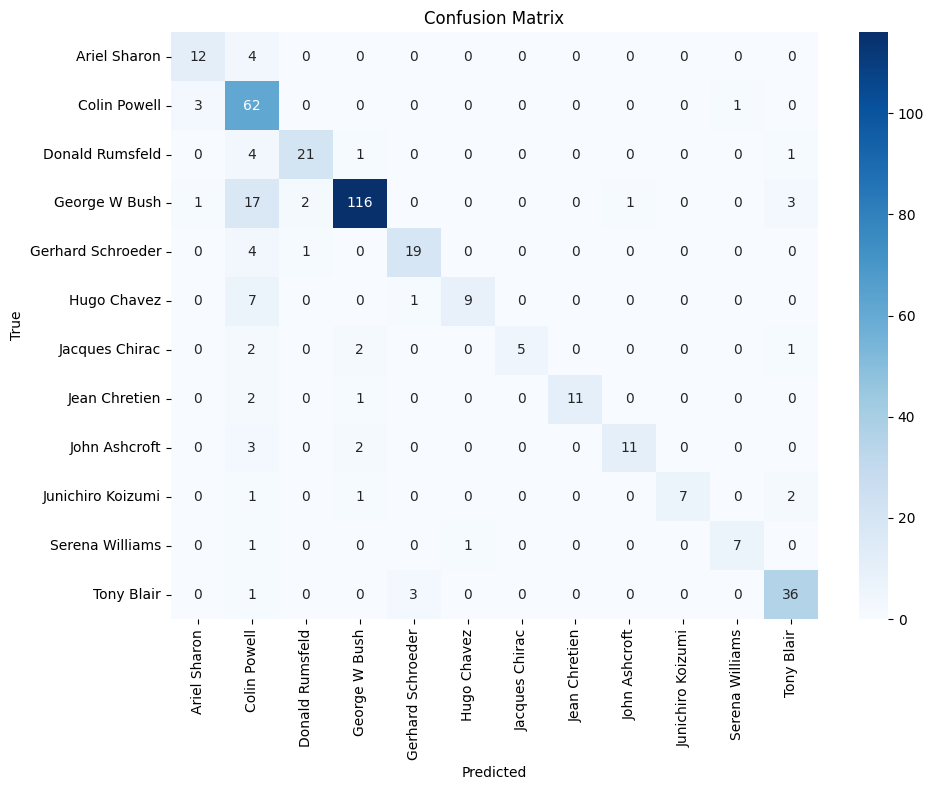

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

def load_lfw_dataset(min_faces=50, resize_factor=0.4):
    print("[INFO] Loading LFW dataset...")
    try:
        lfw = fetch_lfw_people(min_faces_per_person=min_faces, resize=resize_factor)
        X, y = lfw.data, lfw.target
        target_names = lfw.target_names
        images = lfw.images
        print(f"[INFO] Loaded {X.shape[0]} images of shape {lfw.images[0].shape}")
        return X, y, target_names, images
    except EOFError:
        print("[ERROR] Dataset download or extraction error. Please ensure a stable internet connection.")
        return None, None, None, None

def preprocess_data(X):
    print("[INFO] Preprocessing data (scaling)...")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def reduce_dimensionality(X_train, X_test, n_components=150):
    print(f"[INFO] Applying PCA with {n_components} components...")
    pca = PCA(n_components=n_components, whiten=True, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca, pca

def train_classifier(X_train, y_train):
    print("[INFO] Training SVM classifier...")
    clf = SVC(kernel='rbf', class_weight='balanced', probability=True)
    clf.fit(X_train, y_train)
    return clf

def evaluate_model(clf, X_test, y_test, target_names):
    print("[INFO] Evaluating model...")
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"[RESULT] Accuracy: {acc * 100:.2f}%\n")
    print("[DETAILS] Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

def visualize_faces(images, labels, target_names, title):
    plt.figure(figsize=(10, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(target_names[labels[i]])
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def main():
    # Step 1: Load dataset
    X, y, target_names, images = load_lfw_dataset()

    if X is None:
        print("[ERROR] Dataset not loaded. Exiting...")
        return

    # Step 2: Visualize some faces
    visualize_faces(images, y, target_names, "Sample Faces from LFW Dataset")

    # Step 3: Preprocess
    X_scaled = preprocess_data(X)

    # Step 4: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

    # Step 5: Dimensionality Reduction
    X_train_pca, X_test_pca, pca = reduce_dimensionality(X_train, X_test)

    # Step 6: Train Classifier
    clf = train_classifier(X_train_pca, y_train)

    # Step 7: Evaluate Model
    evaluate_model(clf, X_test_pca, y_test, target_names)


if __name__ == "__main__":
    main()




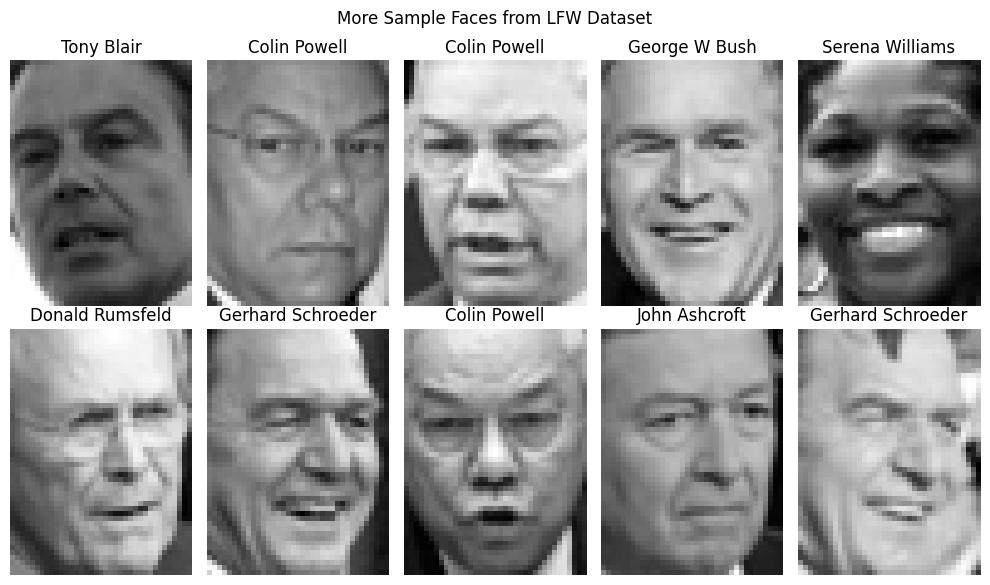

In [3]:
# Show 10 more images from different indices
import matplotlib.pyplot as plt

def show_more_faces(images, labels, target_names, start_idx=10, title="More Sample Faces from LFW Dataset"):
    plt.figure(figsize=(10, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[start_idx + i], cmap='gray')
        plt.title(target_names[labels[start_idx + i]])
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Call the function using already loaded images/y/target_names
# You must have run main() first so X, y, images, etc. are loaded
X, y, target_names, images = fetch_lfw_people(min_faces_per_person=50, resize=0.4, return_X_y=False).data, \
                             fetch_lfw_people(min_faces_per_person=50, resize=0.4, return_X_y=False).target, \
                             fetch_lfw_people(min_faces_per_person=50, resize=0.4, return_X_y=False).target_names, \
                             fetch_lfw_people(min_faces_per_person=50, resize=0.4, return_X_y=False).images

show_more_faces(images, y, target_names, start_idx=20)